# Combining Health and County Climate Data and Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
climate_df = pd.read_csv('../data/cleaned/precip_AirTemp_monthly_1979_2011.zip', parse_dates=['month_year_long'], dtype={'county_FIPS': object})
heat_wave_days_df = pd.read_csv('../data/cleaned/heat_wave_days_1981_2010.csv', parse_dates=['Year'], dtype={'County Code': object})
demo_df = pd.read_csv('../data/cleaned/final_demo.csv', dtype={'fips': object})

#health data
inf_df = pd.read_csv('../data/cleaned/inf_mortality.zip', parse_dates=['year_id'], dtype={'FIPS': object})
resp_df = pd.read_csv('../data/cleaned/resp_mortality.zip', parse_dates=['year_id'], dtype={'FIPS': object})
cvd_df = pd.read_csv('../data/cleaned/cvd_mortality.zip', parse_dates=['year_id'], dtype={'FIPS': object})
substanceInj_df = pd.read_csv('../data/cleaned/cvd_mortality.zip', parse_dates=['year_id'], dtype={'FIPS': object})

In [27]:
substanceInj_df['FIPS'] = substanceInj_df['FIPS'].str.zfill(5)

In [10]:
climate_df.drop(columns='month_year_short', inplace=True)

In [57]:
heat_wave_days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93270 entries, 0 to 93269
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   County                             93270 non-null  object
 1   County Code                        93270 non-null  object
 2   Year                               93270 non-null  object
 3   count_hwDays_onDailyMaxTemp        93270 non-null  int64 
 4   count_hwDays_onDailyMaxHeatIndex   93270 non-null  int64 
 5   count_hwDays_onDailyNetHeatStress  93270 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.3+ MB


<AxesSubplot:xlabel='month_year_long'>

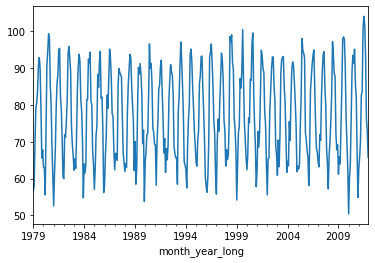

In [18]:
climate_df.groupby(['month_year_long'])['min_dailyMaxAirTemp_F'].max().plot()

In [17]:
inf_byFIPS = inf_df.groupby('FIPS', as_index=False).mean()
inf_byFIPS

,FIPS,cause_id,mx
0,10001,325.166667,7.715546
1,10003,325.166667,7.210907
2,10005,325.166667,7.331949
3,1001,325.166667,6.987768
4,1003,325.166667,4.908287
...,...,...,...
3148,9007,325.166667,5.868227
3149,9009,325.166667,8.120315
3150,9011,325.166667,6.772602
3151,9013,325.166667,6.446620


In [20]:
inf_df['year'] = inf_df['year_id'].dt.year

In [ ]:
inf_df['mx'].plot()

In [17]:
inf_df_both = inf_df[inf_df['sex'] == 'Both']
resp_df_both = resp_df[resp_df['sex'] == 'Both']
cvd_df_both = cvd_df[cvd_df['sex'] == 'Both']

<AxesSubplot:ylabel='cause_name'>

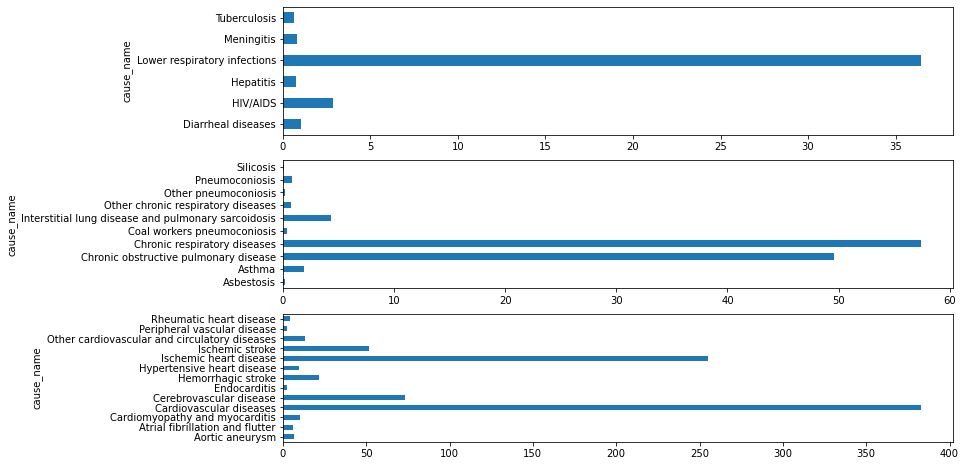

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
inf_df.groupby(['cause_name'])['mx'].mean().plot(kind='barh', ax=ax[0])
resp_df.groupby(['cause_name'])['mx'].mean().plot(kind='barh', ax=ax[1])
cvd_df.groupby(['cause_name'])['mx'].mean().plot(kind='barh', ax=ax[2])

In [4]:
mean_cvd_both_by_FIPS = pd.DataFrame({'FIPS': cvd_df_both.groupby('FIPS'), 'Mean_MX': cvd_df_both.groupby('FIPS')['mx'].mean() })

,location_name,FIPS,cause_id,cause_name,sex,year_id,mx
0,Allen County,20001,297,Tuberculosis,Male,1980-01-01,0.983112
1,Allen County,20001,297,Tuberculosis,Male,1981-01-01,0.936489
2,Allen County,20001,297,Tuberculosis,Male,1982-01-01,0.878845
3,Allen County,20001,297,Tuberculosis,Male,1983-01-01,0.852804
4,Allen County,20001,297,Tuberculosis,Male,1984-01-01,0.800180
...,...,...,...,...,...,...,...
1987015,Worcester County,25027,400,Hepatitis,Both,2010-01-01,0.250162
1987016,Worcester County,25027,400,Hepatitis,Both,2011-01-01,0.235781
1987017,Worcester County,25027,400,Hepatitis,Both,2012-01-01,0.237327
1987018,Worcester County,25027,400,Hepatitis,Both,2013-01-01,0.225477


In [40]:
tb = inf_df[inf_df['cause_name'] == 'Diarrheal diseases']
tb_both = tb[tb['sex'] == 'Both']
tb_both = tb_both[tb_both['FIPS'].isna() == False]
tb_both

,location_name,FIPS,cause_id,cause_name,sex,year_id,mx
22120,Allen County,20001,302,Diarrheal diseases,Both,1980-01-01,0.348368
22121,Allen County,20001,302,Diarrheal diseases,Both,1981-01-01,0.334007
22122,Allen County,20001,302,Diarrheal diseases,Both,1982-01-01,0.323227
22123,Allen County,20001,302,Diarrheal diseases,Both,1983-01-01,0.318195
22124,Allen County,20001,302,Diarrheal diseases,Both,1984-01-01,0.313113
...,...,...,...,...,...,...,...
1982605,Worcester County,25027,302,Diarrheal diseases,Both,2010-01-01,4.988073
1982606,Worcester County,25027,302,Diarrheal diseases,Both,2011-01-01,4.713926
1982607,Worcester County,25027,302,Diarrheal diseases,Both,2012-01-01,4.538294
1982608,Worcester County,25027,302,Diarrheal diseases,Both,2013-01-01,3.842046


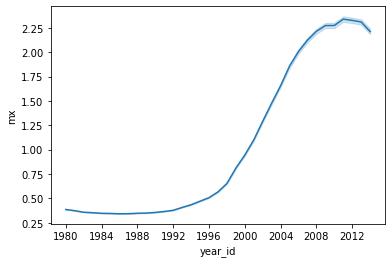

In [41]:
# diarrheal disease deaths, both sexes rate year over year
sns.lineplot(data=tb_both, x='year_id', y='mx');

In [62]:
# inf disease dfs by sex
inf_df_both = inf_df[(inf_df['sex'] == 'Both') & (inf_df['FIPS'].isna() == False)]
inf_df_female = inf_df[(inf_df['sex'] == 'Female') & (inf_df['FIPS'].isna() == False)]
inf_df_male = inf_df[(inf_df['sex'] == 'Male') & (inf_df['FIPS'].isna() == False)]

# resp disease dfs by sex
resp_df_both = resp_df[(resp_df['sex'] == 'Both') & (resp_df['FIPS'].isna() == False)]
resp_df_female = resp_df[(resp_df['sex'] == 'Female') & (resp_df['FIPS'].isna() == False)]
resp_df_male = resp_df[(resp_df['sex'] == 'Male') & (resp_df['FIPS'].isna() == False)]

# cvd disease dfs by sex
cvd_df_both = cvd_df[(cvd_df['sex'] == 'Both') & (cvd_df['FIPS'].isna() == False)]
cvd_df_female = cvd_df[(cvd_df['sex'] == 'Female') & (cvd_df['FIPS'].isna() == False)]
cvd_df_male = cvd_df[(cvd_df['sex'] == 'Male') & (cvd_df['FIPS'].isna() == False)]

In [56]:
cvd_df_both

,location_name,FIPS,cause_name,sex,year_id,mx
70,Beaverhead County,30001,Cardiovascular diseases,Both,1980-01-01,445.466572
71,Beaverhead County,30001,Cardiovascular diseases,Both,1981-01-01,437.666231
72,Beaverhead County,30001,Cardiovascular diseases,Both,1982-01-01,419.543305
73,Beaverhead County,30001,Cardiovascular diseases,Both,1983-01-01,413.574026
74,Beaverhead County,30001,Cardiovascular diseases,Both,1984-01-01,408.961164
...,...,...,...,...,...,...
4290190,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2010-01-01,9.689966
4290191,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2011-01-01,9.641477
4290192,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2012-01-01,9.653720
4290193,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2013-01-01,9.765255


# Year Over Year Disease Graphs

Graphing rates of diseases for respiratory, infectious and cardiovascular for all sexes to identify diseases worth further investigation with climate/demographics.

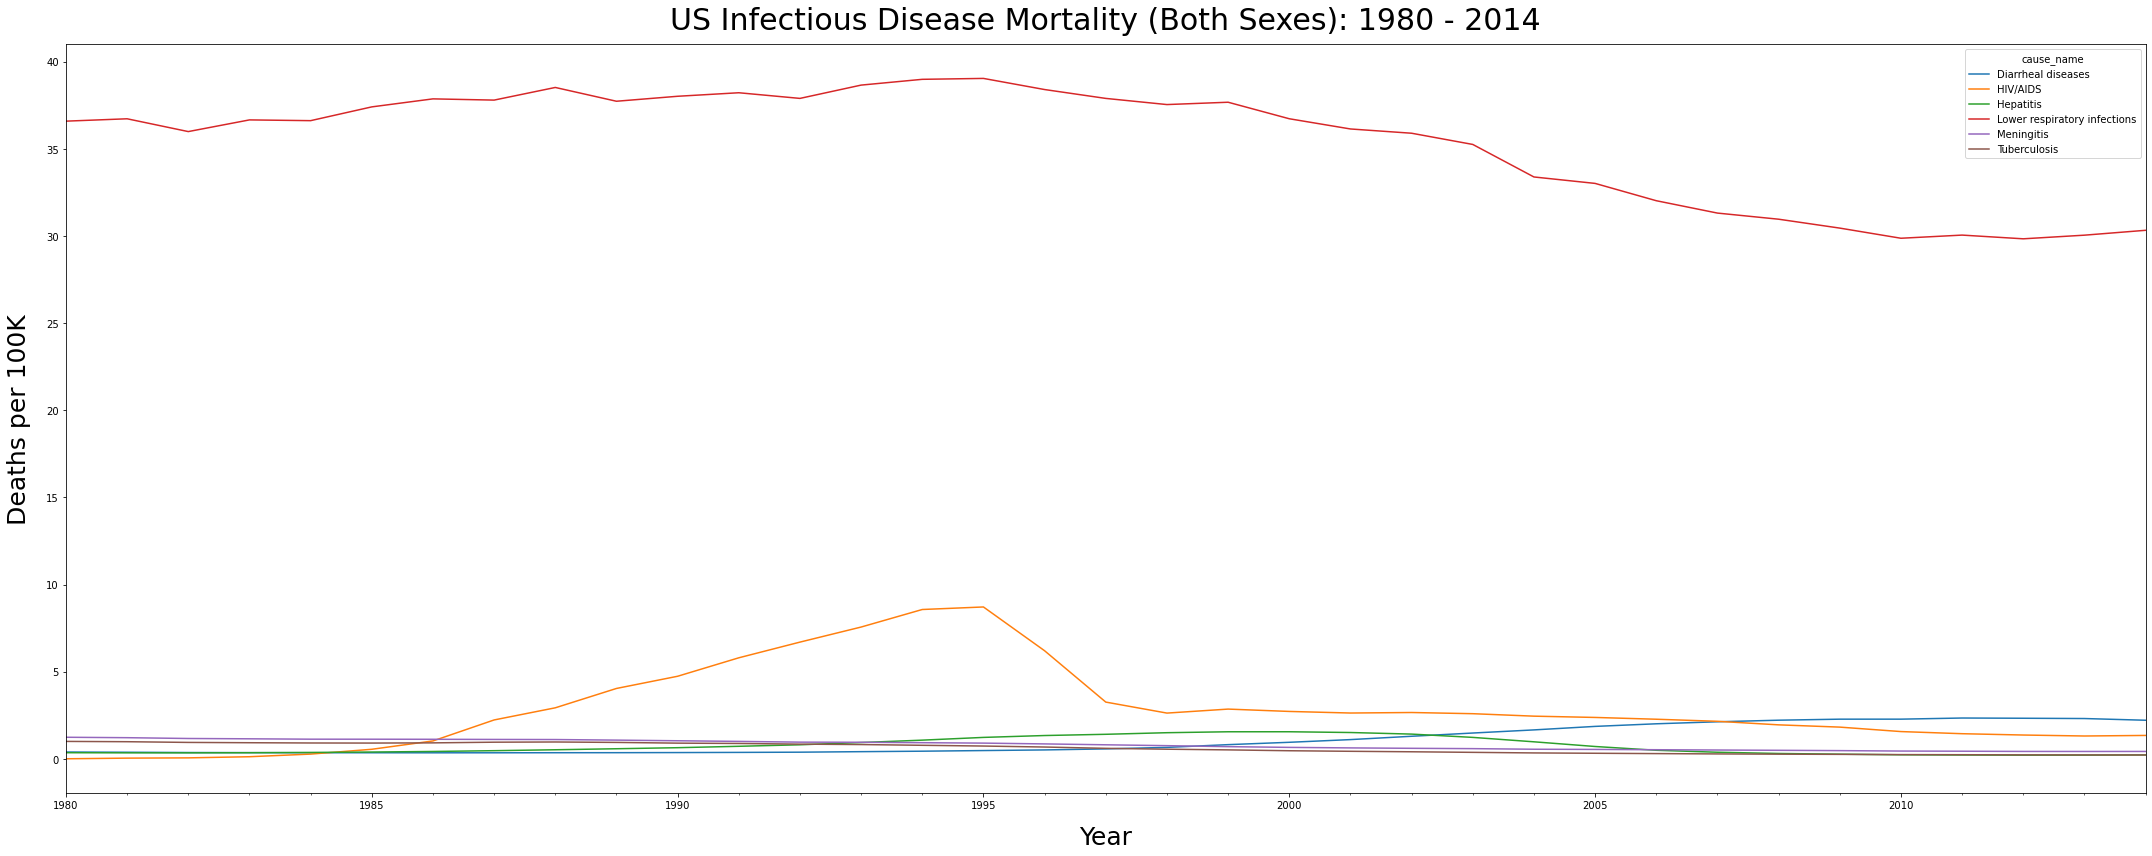

In [76]:
# grouping rates of infectious disease mortality
fig, ax = plt.subplots(figsize=(30, 12))
#fig.suptitle("Infectious Disease Mortality by Sex")
ax.set_title("US Infectious Disease Mortality (Both Sexes): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
inf_df_both.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax)
ax.set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
plt.tight_layout();

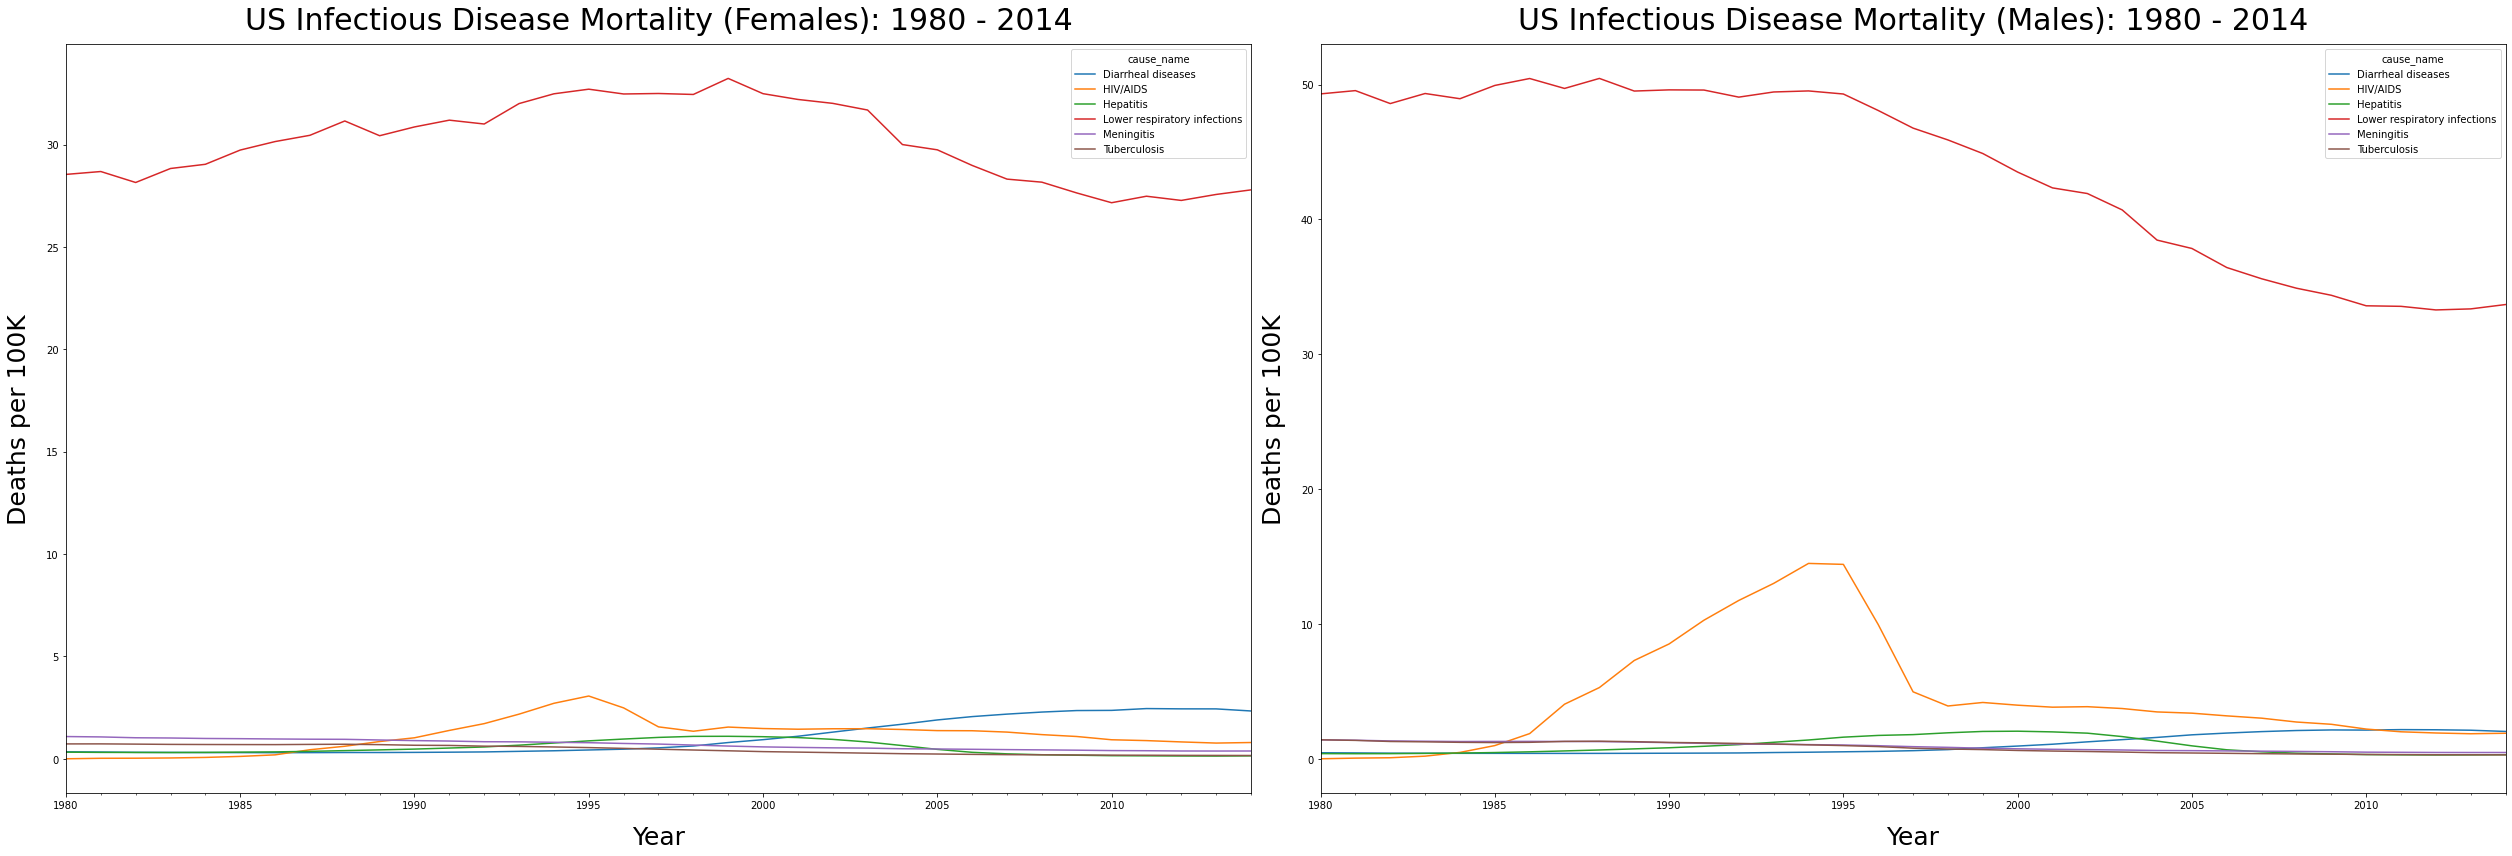

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(35, 12))
#grouping line plot for respiratory diseases
ax[0].set_title("US Infectious Disease Mortality (Females): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
inf_df_female.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[0])
ax[0].set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax[0].set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)

#grouping line plot for cardiovascular diseases
ax[1].set_title("US Infectious Disease Mortality (Males): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
inf_df_male.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[1])
ax[1].set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax[1].set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
plt.tight_layout();

***Infectious Disease Exploration Summary***

Here we see that an overall decrease in both sexes in Lower Respiratory Infections, although deaths from male lower respiratory infections remains higher than women's, even at its trough. 

Here we can also see something we'd expect. Starting around 1985, the mortality rate for HIV/AIDS begins to tick upwards, significantly more so for men than women. The left graph shows HIV/AIDS Deaths plateauing briefly, then ticking down pretty steadily. Remembering history, this follows the timeline of HIV/AIDS in the US, from early cases, to rapidly rising deaths affecting gay/bisexual men most often, and declining once successful pharmaceutical "cocktails" were developed. 

The other interesting trends include a light bump in Hepatitis deaths that eventually returned to its baseline death rate, and a sustained uptick in deaths from Diarrheal diseases. In about 2004, the rate of women's deaths from Diarrheal diseases actually *surpassed* the rate at which women were dying from HIV/AIDS. The mens mortality rates for HIV/AIDS and Diarrheal diseases levels out to approximately the same. 

Because of this, we will spend some time investigating the relationship between diarrheal disease deaths, cenrtain population demographic variables of interest and climate to see if we can identify any noteworthy relationships. 

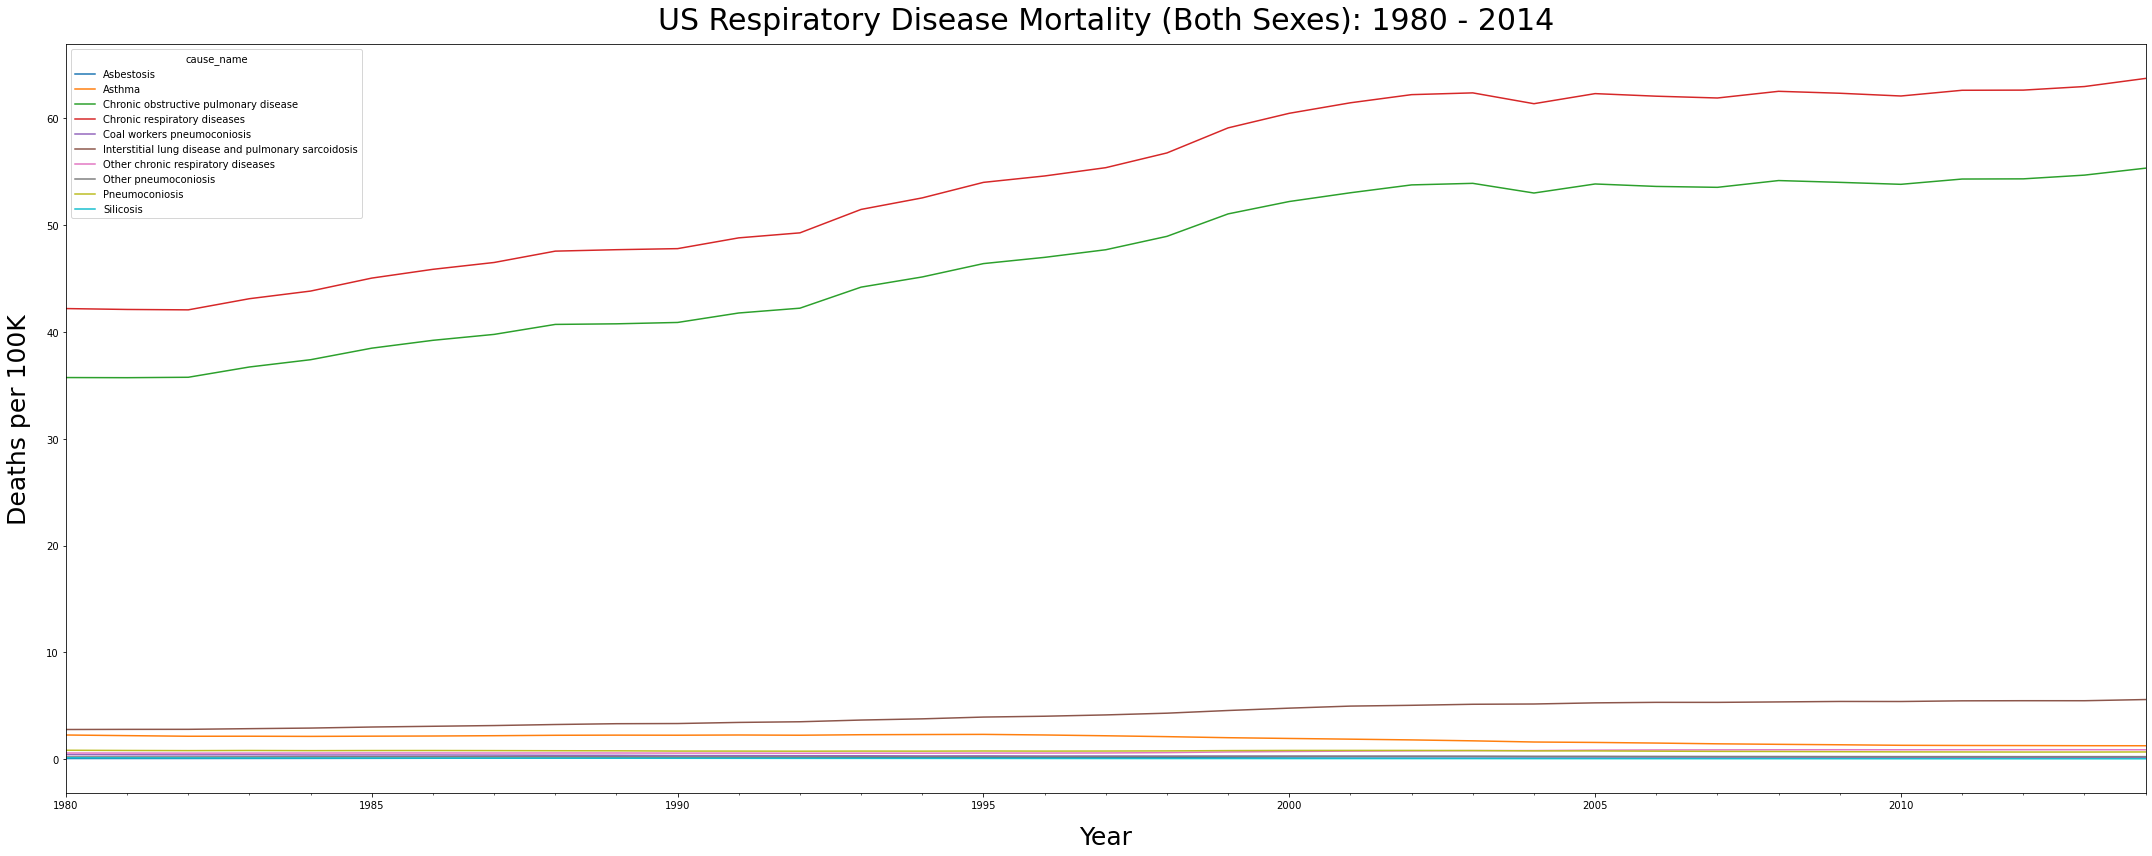

In [85]:
# grouping rates of respiratory disease mortality
fig, ax = plt.subplots(figsize=(30, 12))
#fig.suptitle("Infectious Disease Mortality by Sex")
ax.set_title("US Respiratory Disease Mortality (Both Sexes): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
resp_df_both.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax)
ax.set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
plt.tight_layout();

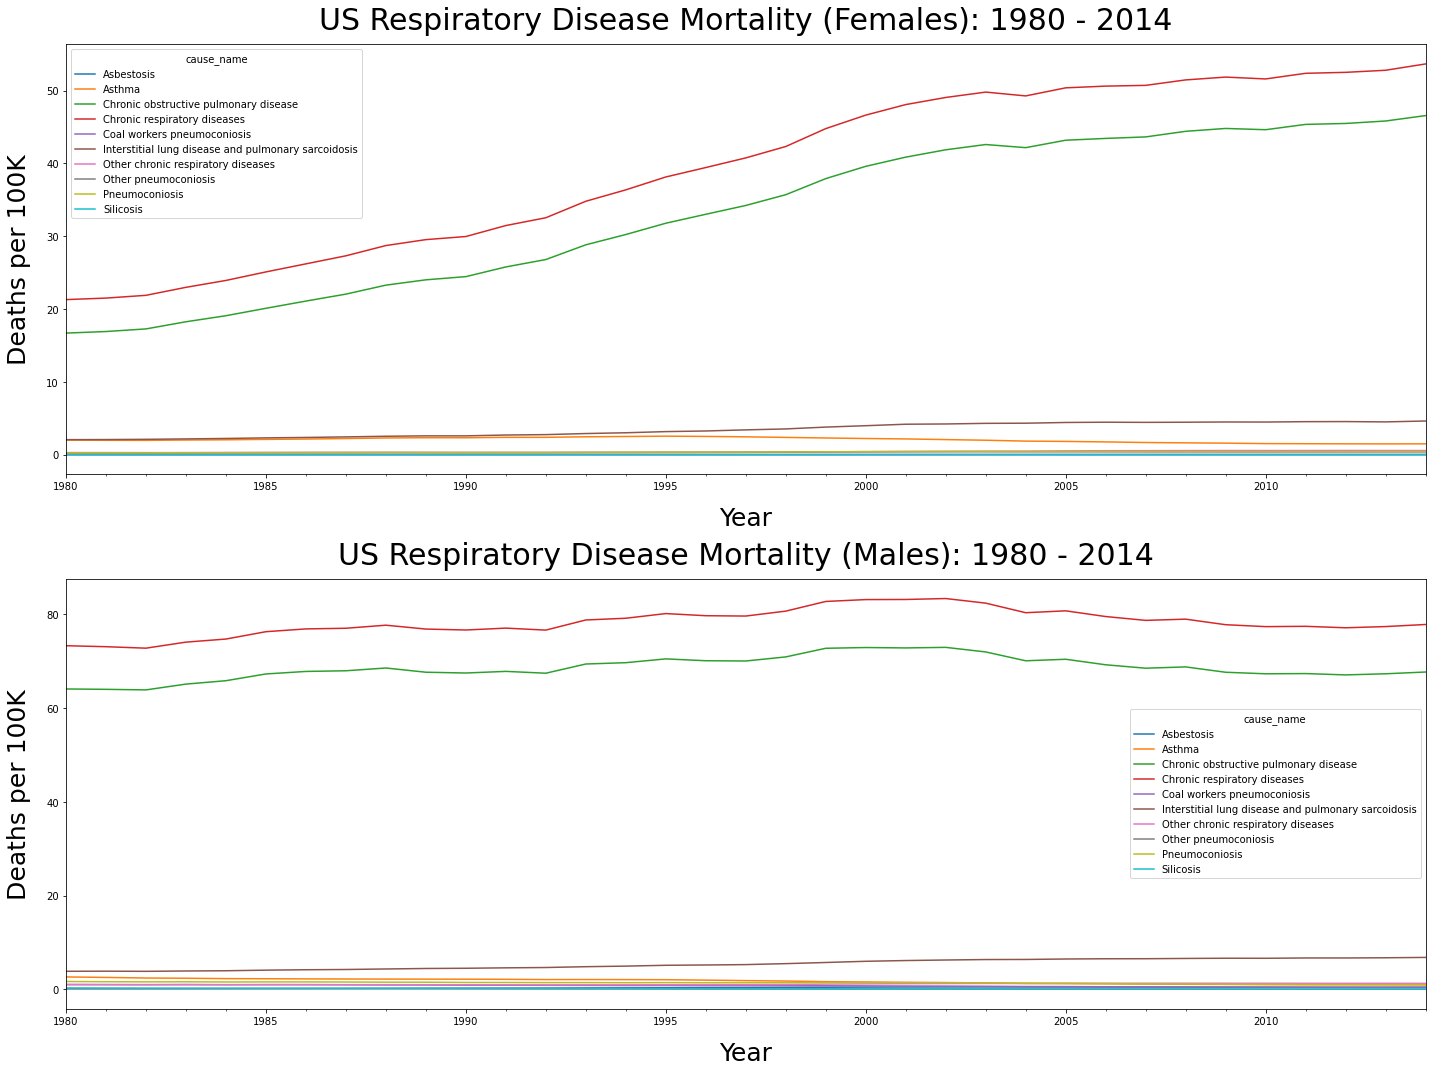

In [87]:
# Respiratory Deaths for Men and Women
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
#grouping line plot for respiratory diseases
ax[0].set_title("US Respiratory Disease Mortality (Females): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
resp_df_female.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[0])
ax[0].set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax[0].set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)

#grouping line plot for cardiovascular diseases
ax[1].set_title("US Respiratory Disease Mortality (Males): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
resp_df_male.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[1])
ax[1].set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax[1].set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
plt.tight_layout();

***Respiratory Disease Mortality Summary***



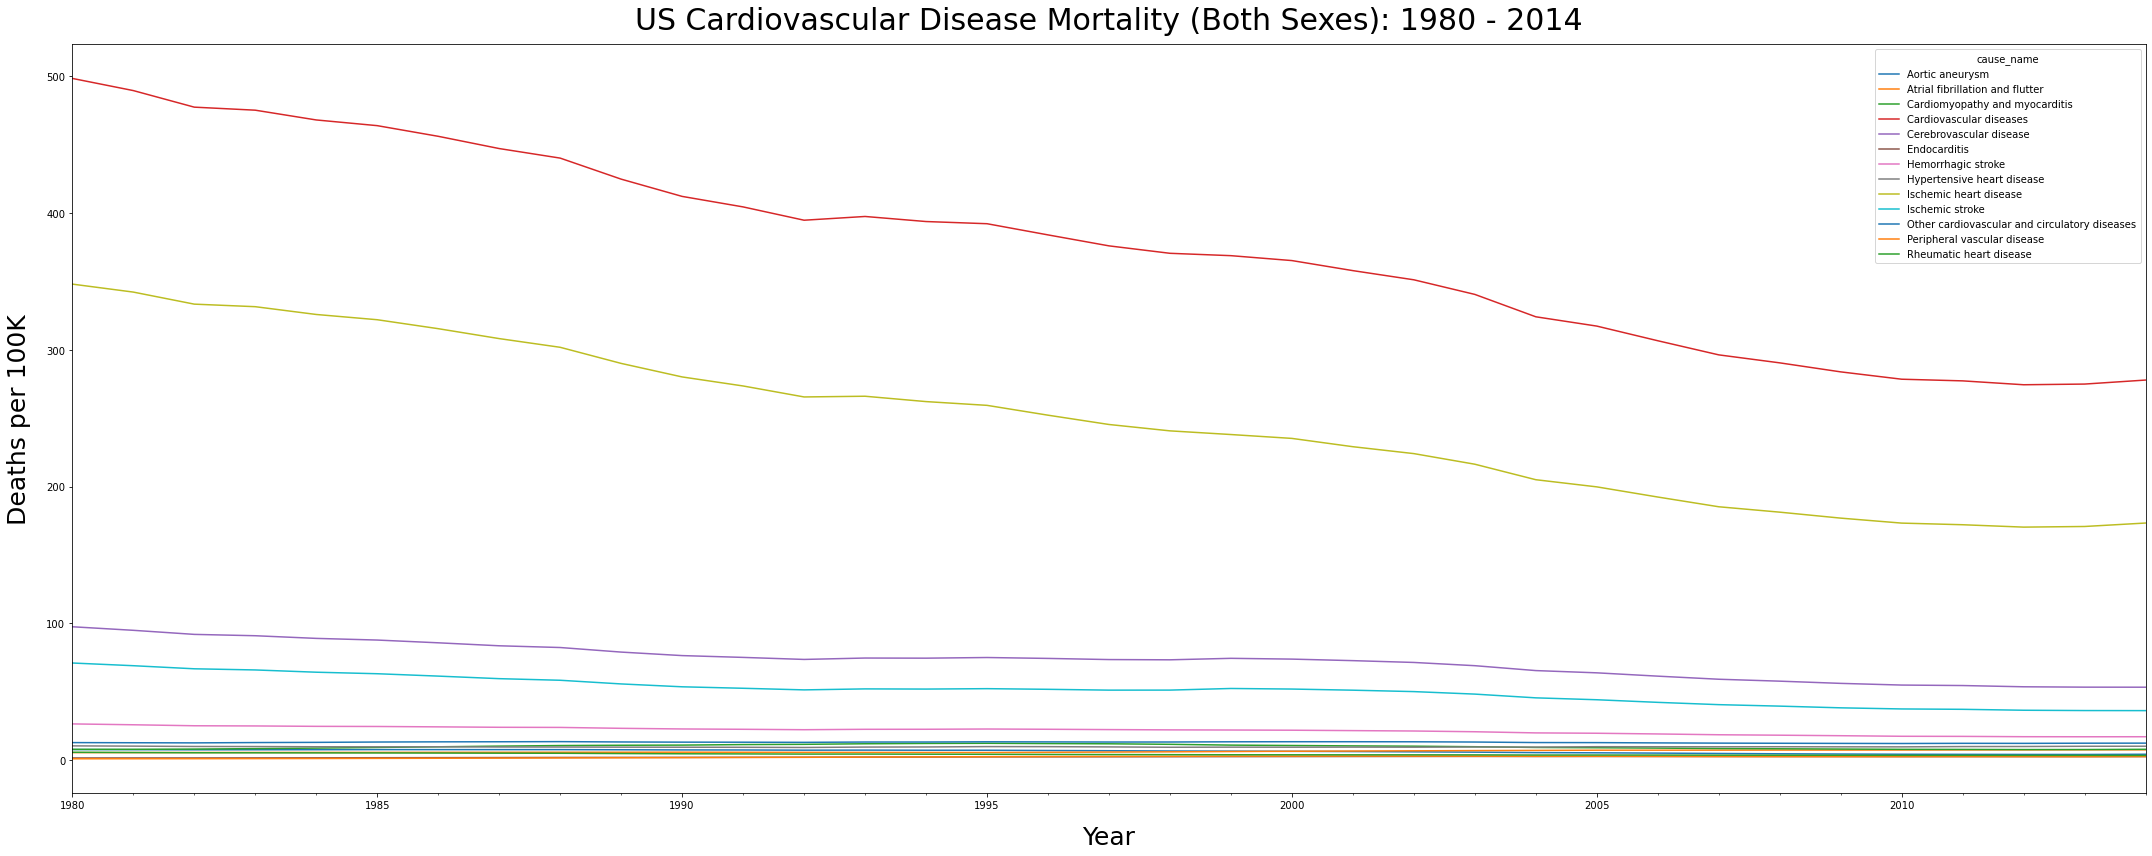

In [91]:
# grouping rates of respiratory disease mortality
fig, ax = plt.subplots(figsize=(30, 12))
#fig.suptitle("Infectious Disease Mortality by Sex")
ax.set_title("US Cardiovascular Disease Mortality (Both Sexes): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
cvd_df_both.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax)
ax.set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax.set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
plt.tight_layout();

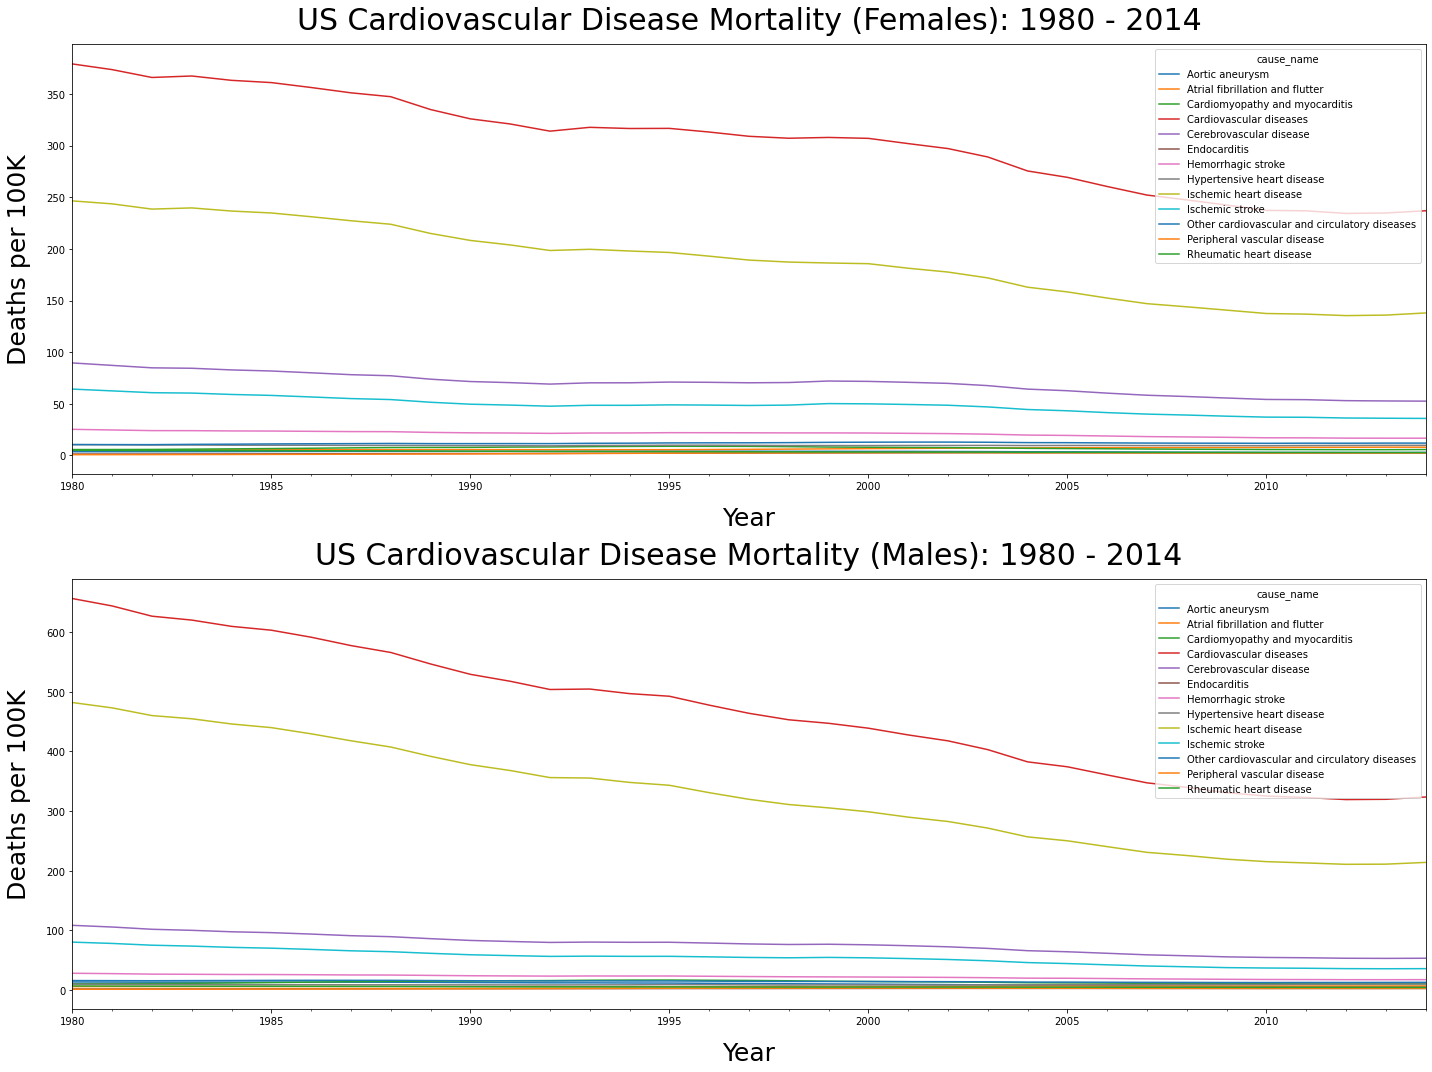

In [93]:
# Cardiovascular Deaths for Men and Women
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
#grouping line plot for respiratory diseases
ax[0].set_title("US Cardiovascular Disease Mortality (Females): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
cvd_df_female.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[0])
ax[0].set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax[0].set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)

#grouping line plot for cardiovascular diseases
ax[1].set_title("US Cardiovascular Disease Mortality (Males): 1980 - 2014", fontdict={'fontsize': 30, 'fontweight': 25}, pad=15)
cvd_df_male.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[1])
ax[1].set_xlabel('Year', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
ax[1].set_ylabel('Deaths per 100K', fontdict={'fontsize': 25, 'fontweight': 25}, labelpad=15)
plt.tight_layout();

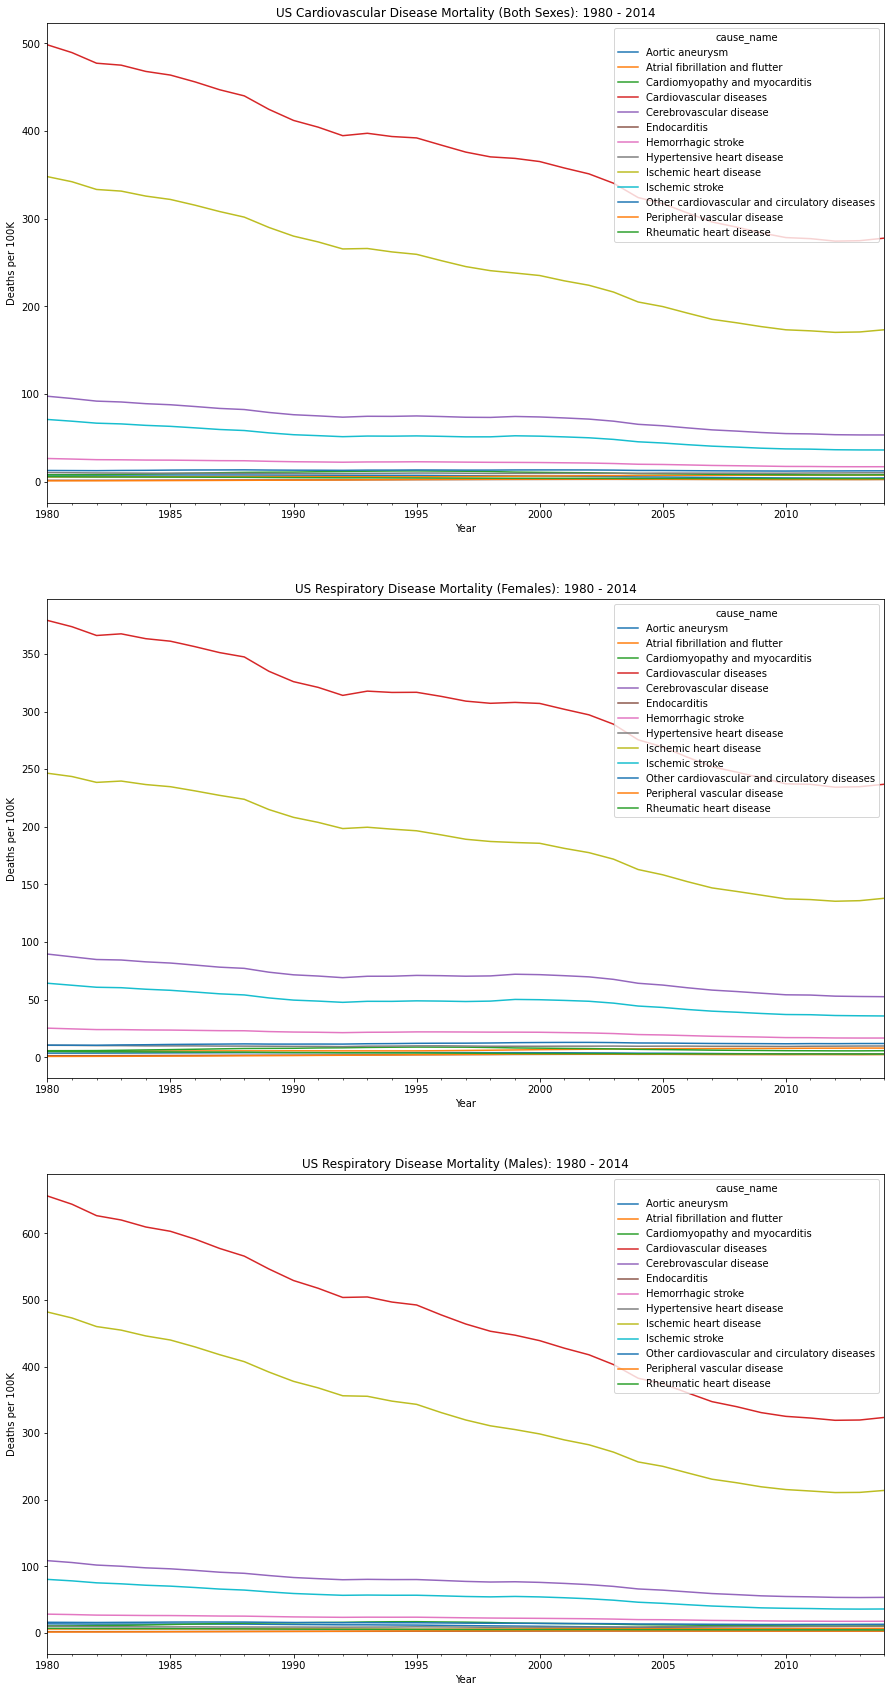

In [65]:
# grouping rates of cardiovascular disease mortality
fig, ax = plt.subplots(3, 1, figsize=(15, 30))
ax[0].set_title("US Cardiovascular Disease Mortality (Both Sexes): 1980 - 2014")
cvd_df_both.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Deaths per 100K')

#grouping line plot for respiratory diseases
ax[1].set_title("US Respiratory Disease Mortality (Females): 1980 - 2014")
cvd_df_female.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Deaths per 100K')

#grouping line plot for cardiovascular diseases
ax[2].set_title("US Respiratory Disease Mortality (Males): 1980 - 2014")
cvd_df_male.groupby(['year_id','cause_name']).mean()['mx'].unstack().plot(ax=ax[2])
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Deaths per 100K');

In [31]:
resp_df_both = resp_df[resp_df['sex'] == 'Both']
resp_df_both

,location_name,FIPS,cause_id,cause_name,sex,year_id,mx
70,Apache County,4001,508,Chronic respiratory diseases,Both,1980-01-01,43.873107
71,Apache County,4001,508,Chronic respiratory diseases,Both,1981-01-01,43.275036
72,Apache County,4001,508,Chronic respiratory diseases,Both,1982-01-01,43.326166
73,Apache County,4001,508,Chronic respiratory diseases,Both,1983-01-01,43.409457
74,Apache County,4001,508,Chronic respiratory diseases,Both,1984-01-01,44.370238
...,...,...,...,...,...,...,...
3311695,Woodford County,17203,520,Other chronic respiratory diseases,Both,2010-01-01,0.775019
3311696,Woodford County,17203,520,Other chronic respiratory diseases,Both,2011-01-01,0.788040
3311697,Woodford County,17203,520,Other chronic respiratory diseases,Both,2012-01-01,0.794533
3311698,Woodford County,17203,520,Other chronic respiratory diseases,Both,2013-01-01,0.808972


In [89]:
for title, group in inf_df.groupby('cause_name'):
    #group.plot(x='year_id', y='mx', title=title, )
    #sns.lineplot(data=group, x='year_id', y='mx')
    print(title, type(group))

Diarrheal diseases <class 'pandas.core.frame.DataFrame'>
HIV/AIDS <class 'pandas.core.frame.DataFrame'>
Hepatitis <class 'pandas.core.frame.DataFrame'>
Lower respiratory infections <class 'pandas.core.frame.DataFrame'>
Meningitis <class 'pandas.core.frame.DataFrame'>
Tuberculosis <class 'pandas.core.frame.DataFrame'>


In [82]:
# # https://stackoverflow.com/questions/16376159/plotting-a-pandas-dataseries-groupby
# plt.figsize=(20, 12)
# for title, group in cvd_df.groupby('cause_name'):
#     group.plot(x='year_id', y='mx', title=title)

In [83]:
# for title, group in resp_df.groupby('cause_name'):
#     group.plot(x='year_id', y='mx', title=title)

In [40]:
inf_df_both = inf_df[inf_df['sex'] == 'Both']
inf_df_male = inf_df[inf_df['sex'] == 'Male']
inf_df_female = inf_df[inf_df['sex'] == 'Female']

<AxesSubplot:xlabel='year_id', ylabel='mx'>

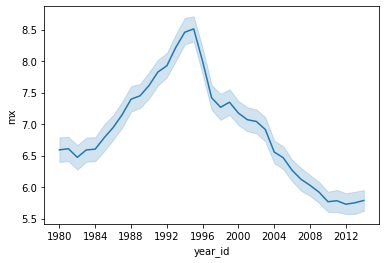

In [35]:
sns.lineplot(data=inf_df_both, x='year_id', y='mx')

<AxesSubplot:xlabel='year_id', ylabel='mx'>

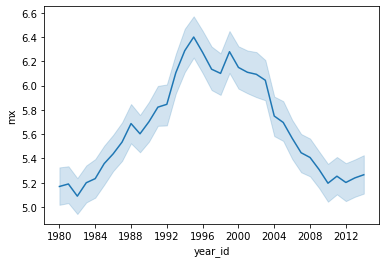

In [80]:
sns.lineplot(data=inf_df_female, x='year_id', y='mx')

<AxesSubplot:xlabel='year_id', ylabel='mx'>

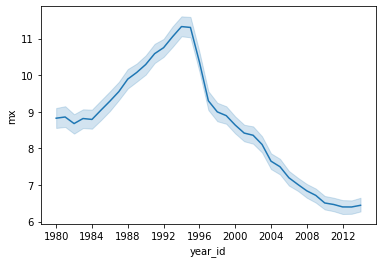

In [81]:
sns.lineplot(data=inf_df_male, x='year_id', y='mx')

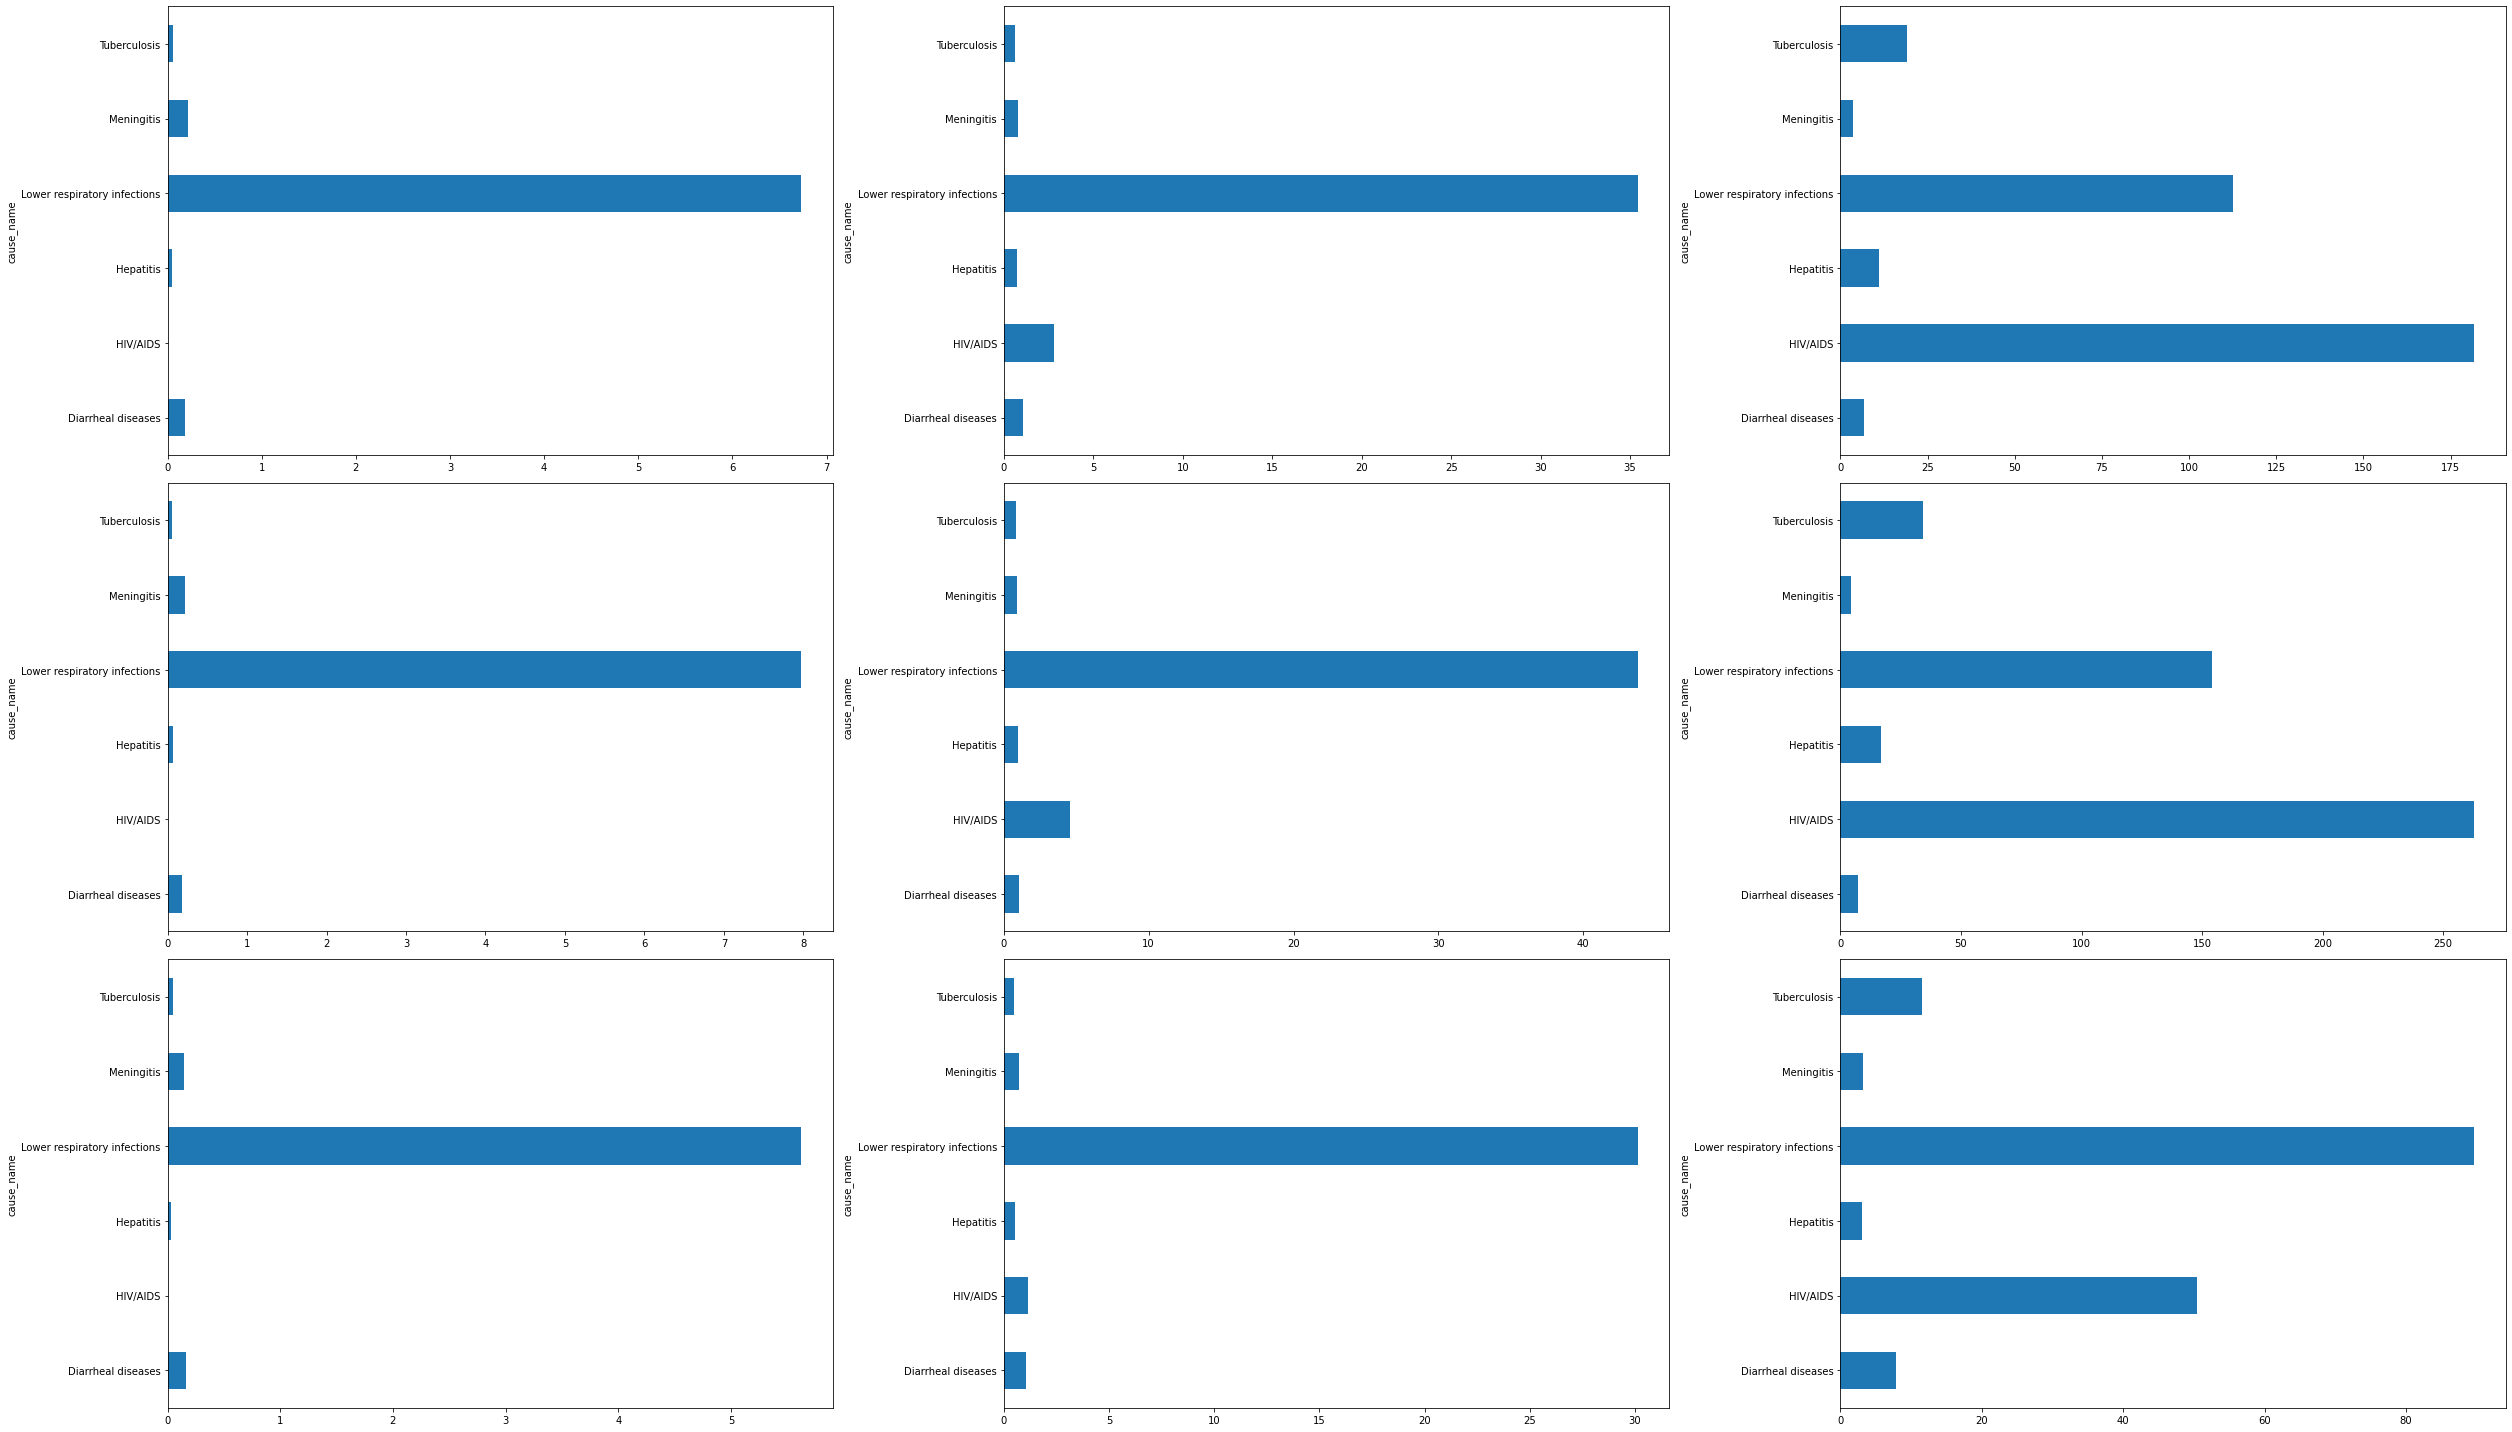

In [55]:
fig, ax = plt.subplots(3, 3, figsize=(35, 20))
inf_df_both.groupby('cause_name')['mx'].min().plot(kind='barh', ax=ax[0][0])
inf_df_both.groupby('cause_name')['mx'].mean().plot(kind='barh', ax=ax[0][1])
inf_df_both.groupby('cause_name')['mx'].max().plot(kind='barh', ax=ax[0][2])

inf_df_male.groupby('cause_name')['mx'].min().plot(kind='barh', ax=ax[1][0])
inf_df_male.groupby('cause_name')['mx'].mean().plot(kind='barh', ax=ax[1][1])
inf_df_male.groupby('cause_name')['mx'].max().plot(kind='barh', ax=ax[1][2])

inf_df_female.groupby('cause_name')['mx'].min().plot(kind='barh', ax=ax[2][0])
inf_df_female.groupby('cause_name')['mx'].mean().plot(kind='barh', ax=ax[2][1])
inf_df_female.groupby('cause_name')['mx'].max().plot(kind='barh', ax=ax[2][2])
plt.tight_layout();
# sns.barplot(data=inf_df_both, y='cause_name', x='mx', ax=ax[0])
# sns.barplot(data=inf_df_male, y='cause_name', x='mx', ax=ax[1])
# sns.barplot(data=inf_df_female, y='cause_name', x='mx', ax=ax[2]);

In [25]:
inf_demo_join_inf = 

,fips,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,...,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,Metro2013,rural_urban_continuum_code_2013,retirement_destination_2015_update,metro_adjacent_2013
0,01001,55380.0,38.2,94.7,23.8,76.2,15.0,Autauga County,Alabama,21397.0,...,55380.0,3.5,7.1,12.6,76.8,74.6,2.0,1.0,1.0,0.0
1,01003,212830.0,43.0,94.7,21.7,78.3,20.0,Baldwin County,Alabama,80930.0,...,212830.0,4.0,8.9,11.8,86.2,83.1,3.0,1.0,1.0,0.0
2,01005,25361.0,40.4,112.4,20.9,79.1,18.6,Barbour County,Alabama,9345.0,...,25361.0,9.4,11.3,6.6,46.8,45.8,6.0,0.0,0.0,1.0
3,01007,22493.0,40.9,117.5,20.6,79.4,15.9,Bibb County,Alabama,6891.0,...,22493.0,7.0,10.7,8.0,76.8,74.5,1.0,1.0,0.0,0.0
4,01009,57681.0,40.7,97.6,23.2,76.8,17.9,Blount County,Alabama,20847.0,...,57681.0,3.1,10.8,7.7,95.5,86.9,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,43521.0,35.3,106.8,26.5,73.5,11.4,Sweetwater County,Wyoming,15523.0,...,43521.0,5.7,11.3,8.6,93.4,79.6,5.0,0.0,0.0,0.0
3138,56039,23280.0,39.3,112.5,19.1,80.9,14.0,Teton County,Wyoming,9019.0,...,23280.0,0.7,12.7,5.3,89.3,81.3,7.0,0.0,0.0,0.0
3139,56041,20479.0,35.8,103.3,29.2,70.8,13.0,Uinta County,Wyoming,7597.0,...,20479.0,5.5,11.2,7.4,93.4,87.5,7.0,0.0,0.0,0.0
3140,56043,8027.0,42.9,102.6,24.6,75.4,21.1,Washakie County,Wyoming,3365.0,...,8027.0,4.1,15.0,11.9,89.7,81.9,7.0,0.0,0.0,0.0
